## Model Training

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# modelling
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


## import dataset

In [26]:
df=pd.read_csv(r'C:\Udemy\Ml Project\notebook\data\stud.csv')

In [27]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
X=df.drop(columns=['math_score'],axis=1)

In [29]:
y=df['math_score']

In [30]:
X.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88


In [31]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [32]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [ ]:
## OneHotEncoder, StandardScaler both combine as single pipline
## create column transformer with three type transformer
num_fea=[feature for feature in X.columns if X[feature].dtype!="O"]
cat_fea=[feature for feature in X.columns if X[feature].dtype=="O"]

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocesser=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_fea),
        ("StandardScaler",numeric_transformer,num_fea),
    ]
)

In [45]:
X=preprocesser.fit_transform(X)

In [47]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.193999,0.391492
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.427476,1.313269
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.770109,1.642475
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.833899,-1.583744
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.605158,0.457333


In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_test.shape

((800, 19), (200,))

#### Create an Evaluate Function to give all metrics after model Training

In [62]:
def evaluate_model(true,predicted):
    r2score=r2_score(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    mae=mean_absolute_error(true,predicted)
    return r2score,mse,rmse,mae

In [65]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
    "XGBRegressor":XGBRegressor()
    
}

model_list=[]
r2_list=[]


for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_test_pred=model.predict(X_test)
    y_train_pred=model.predict(X_train)
    
    # Evaluate Train and Test dataset
    
    test_r2score,test_mse,test_rmse,test_mae=evaluate_model(y_test,y_test_pred)
    train_r2score,train_mse,train_rmse,train_mae=evaluate_model(y_train,y_train_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('modal performence training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_r2score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_r2score))
    r2_list.append(test_r2score)
    
    print('='*35)
    print('\n')
    print()
    

LinearRegression
modal performence training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804



Lasso
modal performence training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253



Ridge
modal performence training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806



KNeighborsRegressor
modal performence training set
- Root Mean Squared Error: 5.7093
- Mean Absolute Error: 4.5175
- R2 Score: 0.8554
----------------------------------
Mode

In [73]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["model","R2_Score"]).sort_values(by=["R2_Score"],ascending=False)

,model,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880433
5,RandomForestRegressor,0.851831
7,CatBoostRegressor,0.851632
6,AdaBoostRegressor,0.849259
8,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783497
4,DecisionTreeRegressor,0.740896


## Linear Regression

In [75]:
lin_model=LinearRegression(fit_intercept=False)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
Accuracy=r2_score(y_test,y_pred)
print("Accuracy",Accuracy*100)

Accuracy 88.04332983749563


## Plot y_pred and y_test

Text(0, 0.5, 'predict')

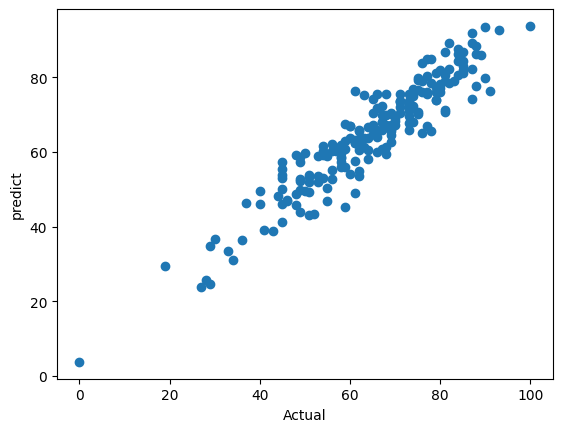

In [77]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predict")

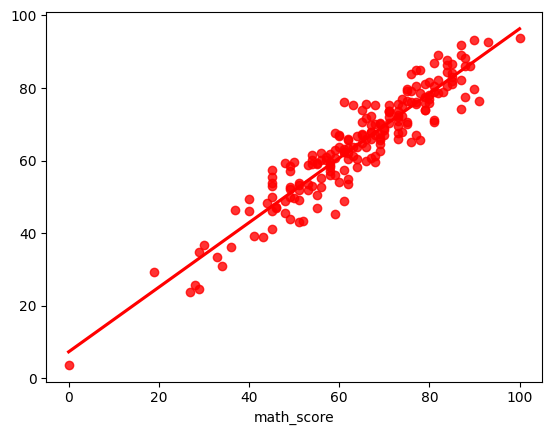

In [78]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [79]:
pred_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,"diffrence":y_test-y_pred})
pred_df

,Actual,Predicted,diffrence
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
